<a href="https://colab.research.google.com/github/arkaslittlemind/Machine-Learning-ITA6016/blob/main/Neural%20Network%20Classification%20Task%2015-07-2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import dependent libraries**

In [17]:
import pandas as pd
import numpy as np
import os
# Plotting libraries
import matplotlib.pyplot as plt
# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [18]:
iris_data = pd.read_csv("Iris.csv")

In [19]:
iris_data.info()
print("=="*40)
iris_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


**Preparing Dataset**

In [20]:
X = iris_data.loc[:, iris_data.columns != 'Species']
y = iris_data.loc[:, ['Species']]

In [21]:
y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_label, test_size=0.15)

# Validation set
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [23]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 5), Y Train : (105, 3)
(5,)


In [24]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(500, activation='relu'),
        keras.layers.Dense(200, activation='relu',),
        keras.layers.Dense(3, activation='softmax')
    ])

    return model

In [25]:
model = get_model()

# Compile the model
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               3000      
                                                                 
 dense_4 (Dense)             (None, 200)               100200    
                                                                 
 dense_5 (Dense)             (None, 3)                 603       
                                                                 
Total params: 103,803
Trainable params: 103,803
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 2s 358ms/step - loss: 3.5575 - accuracy: 0.3429 - val_loss: 1.6985 - val_accuracy: 0.4222
Epoch 2/30
4/4 [==============================] - 0s 54ms/step - loss: 2.2634 - accuracy: 0.4095 - val_loss: 2.3396 - val_accuracy: 0.3778
Epoch 3/30
4/4 [==============================] - 0s 51ms/step - loss: 1.5697 - accuracy: 0.4381 - val_loss: 0.8488 - val_accuracy: 0.6000
Epoch 4/30
4/4 [==============================] - 0s 40ms/step - loss: 0.9270 - accuracy: 0.5810 - val_loss: 0.7228 - val_accuracy: 0.5333
Epoch 5/30
4/4 [==============================] - 0s 58ms/step - loss: 0.7984 - accuracy: 0.5714 - val_loss: 0.6184 - val_accuracy: 0.7111
Epoch 6/30
4/4 [==============================] - 0s 80ms/step - loss: 0.6203 - accuracy: 0.7143 - val_loss: 0.5085 - val_accuracy: 0.7333
Epoch 7/30
4/4 [==============================] - 0s 34ms/step - loss: 0.5744 - accuracy: 0.6571 - val_loss: 0.5071 - val_accuracy: 0.7778
Epoch 8/30
4/4 [==========

In [28]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 14ms/step - loss: 0.3359 - accuracy: 0.8667


[0.3358778953552246, 0.8666666746139526]

**Performance Monitor**

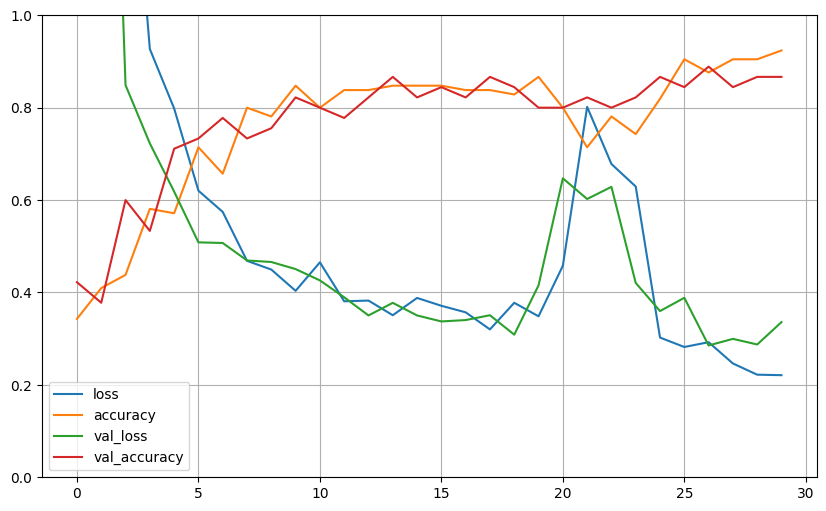

In [29]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()